<a href="https://colab.research.google.com/github/Abril-Mendieta/challenge1-python-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [65]:
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.0f}'.format

import matplotlib.pyplot as plt

In [48]:
# Enfoque alternativo: usamos groupby + agg y formateamos la salida.
# Esto nos da exactamente la suma del campo 'Precio' por tienda.

# Asegurarnos que la columna Precio sea numérica (limpieza por si vienen como strings)
if df_tiendas['Precio'].dtype == 'O':
    # eliminar símbolos y convertir; si hay errores, quedarán NaN
    df_tiendas['Precio'] = (
        df_tiendas['Precio']
        .astype(str)
        .str.replace(r'[^0-9\.\-]', '', regex=True)
        .replace('', pd.NA)
    )
    df_tiendas['Precio'] = pd.to_numeric(df_tiendas['Precio'], errors='coerce')

ingresos_por_tienda = (
    df_tiendas
    .groupby('Tienda', dropna=False, as_index=False)
    .agg(Ingreso_Total=('Precio', 'sum'),
         Registros=('Precio', 'count'))
    .sort_values('Ingreso_Total', ascending=False)
    .reset_index(drop=True)
)

# Mostrar resultados
print("1) Ingreso total por tienda:")
print(ingresos_por_tienda)

1) Ingreso total por tienda:
     Tienda  Ingreso_Total  Registros
0  Tienda_1  1,150,880,400       2359
1  Tienda_2  1,116,343,500       2359
2  Tienda_3  1,098,019,600       2359
3  Tienda_4  1,038,375,700       2358


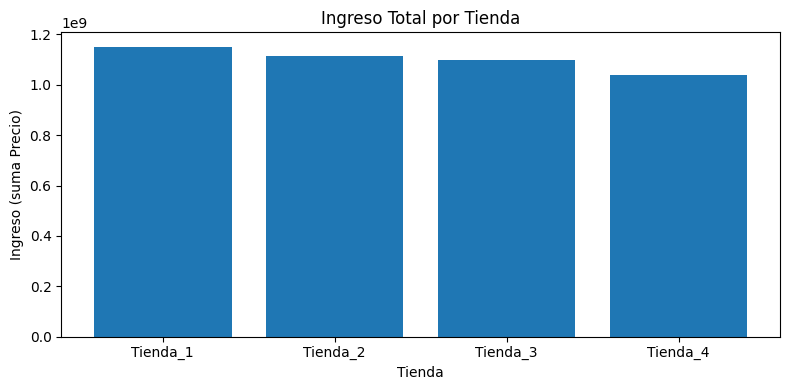

In [86]:
plt.figure(figsize=(8,4))
plt.bar(ingresos_por_tienda['Tienda'], ingresos_por_tienda['Ingreso_Total'])
plt.title('Ingreso Total por Tienda')
plt.ylabel('Ingreso (suma Precio)')
plt.xlabel('Tienda')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [50]:
# Aquí calculamos: - Ingreso total por categoría - Número de ventas (registros)
# - Participación porcentual en ingresos (para ver qué categorías dominan).

# Aseguramos que exista la columna de categoría en español o similar
possible_category_cols = ['Categoría', 'Categoria', 'Categoria ', 'Categoria', 'Category']
cat_col = next((c for c in df_tiendas.columns if c in possible_category_cols), None)

In [51]:
# Si no está, intentamos detectar por substring
if cat_col is None:
    for c in df_tiendas.columns:
        if 'cat' in c.lower() or 'categor' in c.lower():
            cat_col = c
            break

In [52]:
if cat_col is None:
    raise KeyError("No se encontró una columna de categoría en el dataset. Columnas disponibles: "
                   + ", ".join(df_tiendas.columns))

In [55]:
# Calculamos ventas por categoría
ventas_por_categoria = (
    df_tiendas
    .groupby(cat_col, as_index=False)
    .agg(Ventas_Totales=('Precio', 'sum'),
         Cantidad_Ventas=('Precio', 'count'))
    .sort_values('Ventas_Totales', ascending=False)
    .reset_index(drop=True))

In [56]:
# Añadimos columna de participación porcentual en ingresos
total_ingresos = ventas_por_categoria['Ventas_Totales'].sum()
ventas_por_categoria['Participacion_%'] = (ventas_por_categoria['Ventas_Totales'] / total_ingresos * 100).round(2)

In [57]:
print("2) Ventas por categoría (ingreso, cantidad, participación %):")
print(ventas_por_categoria)

2) Ventas por categoría (ingreso, cantidad, participación %):
    Categoría del Producto  Ventas_Totales  Cantidad_Ventas  Participacion_%
0             Electrónicos   1,660,576,500             1772               38
1        Electrodomésticos   1,324,751,100             1149               30
2                  Muebles     757,661,000             1886               17
3   Instrumentos musicales     348,772,600              753                8
4     Deportes y diversión     142,977,700             1113                3
5                 Juguetes      73,604,400             1290                2
6  Artículos para el hogar      57,579,800              730                1
7                   Libros      37,696,100              742                1


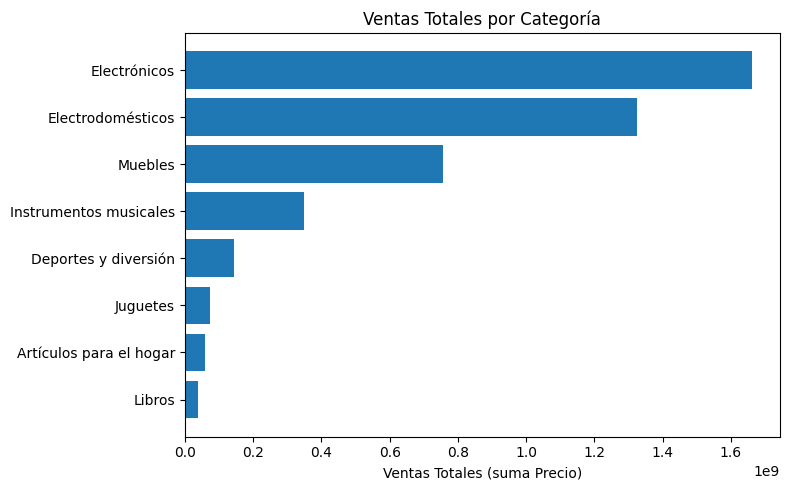

In [83]:
plt.figure(figsize=(8,5))
plt.barh(ventas_por_categoria[cat_col].astype(str), ventas_por_categoria['Ventas_Totales'])
plt.title('Ventas Totales por Categoría')
plt.xlabel('Ventas Totales (suma Precio)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [58]:
top_n = 10  # puedes cambiar este número
ingreso_por_producto = df_tiendas.pivot_table(index='Producto', values='Precio', aggfunc='sum').squeeze()
top_productos = ingreso_por_producto.nlargest(top_n).reset_index().rename(columns={0: 'Ingreso_Total', 'Precio':'Ingreso_Total'})
top_productos.columns = ['Producto', 'Ingreso_Total']  # asegurar nombres

print(f"3) Top {top_n} productos por ingreso:")
print(top_productos)

3) Top 10 productos por ingreso:
           Producto  Ingreso_Total
0     TV LED UHD 4K    432,489,600
1         Iphone 15    401,051,200
2      Refrigerador    384,937,400
3          Smart TV    290,221,800
4  Lavadora de ropa    242,468,600
5      Lavavajillas    240,536,500
6       Tablet ABXY    219,012,800
7  Secadora de ropa    210,238,000
8      Celular ABXY    157,911,100
9           Batería    147,806,300


# 4. Productos más y menos vendidos

In [59]:
# Proporcionamos un resumen rápido (mediana, media, min, max) como apoyo al análisis.
resumen_precio = df_tiendas['Precio'].describe()[['count','mean','std','min','25%','50%','75%','max']]
print("4) Resumen estadístico de 'Precio':")
print(resumen_precio)

4) Resumen estadístico de 'Precio':
count       9,435
mean      466,732
std       590,321
min         7,600
25%        55,200
50%       221,500
75%       663,300
max     2,977,000
Name: Precio, dtype: float64


# 5. Envío promedio por tienda

In [60]:
# Este bloque detecta la columna de envío (si existe), limpia y calcula el promedio por tienda.
# Soporta varios nombres posibles para la columna de envío.

possible_shipping_cols = [
    'Envio', 'Envío', 'envio', 'shipping', 'Shipping', 'Shipping Cost', 'Envio (USD)',
    'Costo_envío', 'Costo Envío', 'Costo_envio', 'envio_usd'
]

shipping_col = None
for opc in possible_shipping_cols:
    if opc in df_tiendas.columns:
        shipping_col = opc
        break

In [61]:
# si no encontramos nombre exacto, buscamos columnas que contengan 'env' o 'ship'
if shipping_col is None:
    for c in df_tiendas.columns:
        if 'env' in c.lower() or 'ship' in c.lower():
            shipping_col = c
            break

In [79]:
if shipping_col is None:
    # No hay columna de envío; informamos y mostramos columnas para diagnóstico.
    print("⚠️ No se detectó una columna de envío en el dataset. Columnas disponibles:")
    print(df_tiendas.columns.tolist())
    envio_por_tienda = None
else:
    # Limpiamos la columna de envío por si tiene símbolos o valores no numéricos
    s = df_tiendas[shipping_col].astype(str).copy()
    # eliminar espacios y símbolos, dejar números, punto y guion
    s = s.str.replace(r'[^0-9\.\-]', '', regex=True)
    s = s.replace('', pd.NA)
    df_tiendas['_envio_clean'] = pd.to_numeric(s, errors='coerce')

    envio_por_tienda = (
            df_tiendas
            .groupby('Tienda', as_index=False)
            .agg(Envio_Promedio=('_envio_clean', 'mean'),
                 Envios_Registrados=('_envio_clean', 'count'))
        )
    # Formatear con 2 decimales
    envio_por_tienda['Envio_Promedio'] = envio_por_tienda['Envio_Promedio'].round(2)

    print("5) Envío promedio por tienda (si se detectó columna de envío):")
    print(envio_por_tienda)

5) Envío promedio por tienda (si se detectó columna de envío):
     Tienda  Envio_Promedio  Envios_Registrados
0  Tienda_1          26,019                2359
1  Tienda_2          25,216                2359
2  Tienda_3          24,806                2359
3  Tienda_4          23,459                2358


In [77]:
envio_por_tienda = (
        df_tiendas
        .groupby('Tienda', as_index=False)
        .agg(Envio_Promedio=('_envio_clean', 'mean'),
             Envios_Registrados=('_envio_clean', 'count'))
    )

In [87]:
# Formatear con 2 decimales
envio_por_tienda['Envio_Promedio'] = envio_por_tienda['Envio_Promedio'].round(2)



In [88]:
print(envio_por_tienda)

     Tienda  Envio_Promedio  Envios_Registrados
0  Tienda_1          26,019                2359
1  Tienda_2          25,216                2359
2  Tienda_3          24,806                2359
3  Tienda_4          23,459                2358


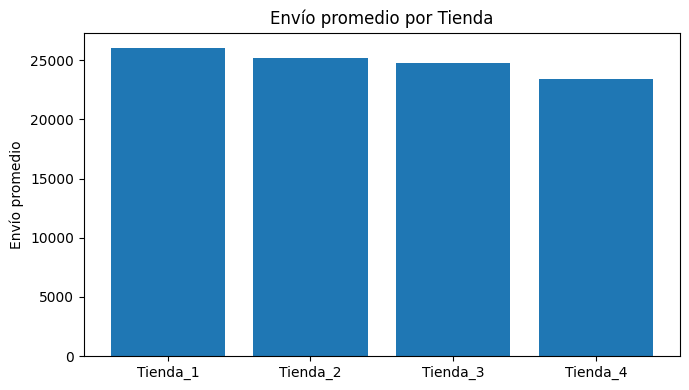

In [84]:
if envio_por_tienda is not None:
    plt.figure(figsize=(7,4))
    plt.bar(envio_por_tienda['Tienda'], envio_por_tienda['Envio_Promedio'])
    plt.title('Envío promedio por Tienda')
    plt.ylabel('Envío promedio')
    plt.tight_layout()
    plt.show()